In [17]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras import regularizers

In [2]:
encoding_dim = 32

In [3]:
# input_img = Input(shape=(784, ))

# ## 1 simplest
# #encoded = Dense(encoding_dim, activation='relu')(input_img)

# ## 2 add sparsity constraint
# #encoded = Dense(encoding_dim, activation='relu',
# #               activity_regularizer=regularizers.l1(10e-5))(input_img)
# # decoded = Dense(784, activation='sigmoid')(encoded)

# ## 3 deeper
# encoded = Dense(128, activation='relu')(input_img)
# encoded = Dense(64, activation='relu')(encoded)
# encoded = Dense(32, activation='relu')(encoded)

# decoded = Dense(64, activation='relu')(encoded)
# decoded = Dense(128, activation='relu')(decoded)
# decoded = Dense(784, activation='sigmoid')(decoded)

# autoencoder = Model(input_img, decoded)

In [ ]:
input_img = Input(shape=(28 ,28 , 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)


In [4]:
encoder = Model(input_img, encoded)

In [7]:
encoded_input = Input(shape=(encoding_dim, ))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = Model(encoded_input, decoder_layer)

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
from keras.datasets import mnist

In [10]:
import numpy as np

In [11]:
(x_train, _), (x_test, _) = mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.3343 - val_loss: 0.2629
Epoch 2/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2567 - val_loss: 0.2499
Epoch 3/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2403 - val_loss: 0.2291
Epoch 4/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2194 - val_loss: 0.2106
Epoch 5/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2076 - val_loss: 0.2001
Epoch 6/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1977 - val_loss: 0.1922
Epoch 7/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1876 - val_loss: 0.1832
Epoch 8/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1800 - val_loss: 0.1805
Epoch 9/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1735 - val_loss: 0.1

60000/60000 [==============================] - 2s 26us/step - loss: 0.1055 - val_loss: 0.1042
Epoch 78/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1052 - val_loss: 0.1036
Epoch 79/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.1050 - val_loss: 0.1027
Epoch 80/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1047 - val_loss: 0.1042
Epoch 81/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1044 - val_loss: 0.1031
Epoch 82/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1041 - val_loss: 0.1026
Epoch 83/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1040 - val_loss: 0.1030
Epoch 84/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1038 - val_loss: 0.1032
Epoch 85/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1037 - val_loss: 0.1047
Epoch 86/100
60000/60000 [========================

In [14]:
encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

In [15]:
import matplotlib.pyplot as plt

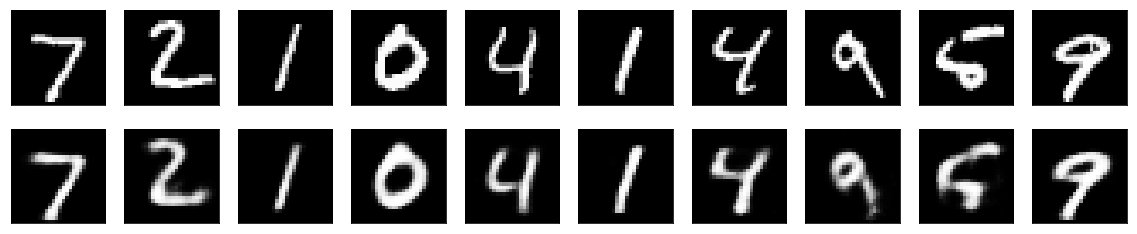

In [16]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()